# Ingeniería de Características: Transformaciones de Variables (Core)

##  Descripción:

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Objetivo:

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.

## Instrucciones:

### 1. Carga de datos:

* Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
* Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

### 2. Exploración y preprocesamiento de datos:

* Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
* También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

### 3. Transformaciones de variables:

* Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
* Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
* Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

### 4. Evaluación de las transformaciones:

* Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
* Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

### 5. Interpretación de los resultados:

* Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
* Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.

# Resolución

## 1. Carga de datos

In [439]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/c/house-prices-advanced-regression-techniques",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/house-prices-advanced-regression-techniques" (use force=True to force download)


In [440]:
import pandas as pd

camino_ds_train = "../data/house-prices-advanced-regression-techniques/train.csv"
# Usamos el parametro keep_default_na porque existen
na_values = [
    "", 
    "#N/A", 
    "#N/A N/A", 
    "#NA", 
    "-1.#IND", 
    "-1.#QNAN", 
    "-NaN", 
    "-nan", 
    "1.#IND", 
    "1.#QNAN", 
    "<NA>", 
    "N/A", 
    # "NA", 
    "NULL", 
    "NaN", 
    "n/a", 
    "nan", 
    "null",
]

# Se usan los parámetros na_values y keep_default_valures de acuerdo
# a lo especificado aquí: https://stackoverflow.com/a/66715400
# Esto se realiza porque existen valores NA en el dataset que son reconocidos como nulos.
# Investigando en data_description.txt también vemos que estos valores son efectivamente válidos para
# ciertas columnas.
df = pd.read_csv(camino_ds_train, delimiter=",", na_values=na_values, keep_default_na=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [441]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


In [442]:
duplicados_id = df.duplicated(["Id"])

cant_registros_duplicados_id = duplicados_id.sum()

print(f"Cant. de Registros Duplicados Id: {cant_registros_duplicados_id}")

Cant. de Registros Duplicados Id: 0


No parecen existir IDs duplicadas, por lo que se puede considerar que no hay duplicados en el dataset de train. Adicionalmente, la columna Id posiblemente venga de algún tipo de base de datos relacional, y en general no servirá para realizar predicciones, por lo que se opta por eliminar esta columna. Este paso también deberá realizarse en el dataset de pruebas una vez que el modelo esté entrenado.

In [443]:
df.drop("Id", axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

### Verificación y ajuste de tipos de datos

In [444]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Street': ['Pave' 'Grvl']
Valores de columna 'Utilities': ['AllPub' 'NoSeWa']
Valores de columna 'CentralAir': ['Y' 'N']
La columna 'CentralAir' es booleana. Será convertida.
Columnas convertidas a booleanas: ['CentralAir']


In [445]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
Valores únicos para columna 'LotFrontage': ['65', '80', '68', '60', '84', '85', '75', 'NA', '51', '50', '70', '91', '72', '66', '101', '57', '44', '110', '98', '47', '108', '112', '74', '115', '61', '48', '33', '52', '100', '24', '89', '63', '76', '81', '95', '69', '21', '32', '78', '121', '122', '40', '105', '73', '77', '64', '94', '34', '90', '55', '88', '82', '71', '120', '107', '92', '134', '62', '86', '141', '97', '54', '41', '79', '174', '99', '67', '83', '43', '103', '93', '30', '129', '140', '35', '37', '118', '87', '116', '150', '111', '49', '96', '59', '36', '56', '102', '58', '38', '109', '130', '53', '137', '45', '106', '104', '42', '39', '144', '114', '128', '149', '313', '168', '182', '138', '160', '152', '124', '153', '46']
Valores únicos para columna 'Street': ['Pave', 'Grvl']
Valores únicos para columna 'Alley': ['NA', 'Grvl', 'Pave']
Valores únicos para columna 'LotShape': ['Reg', 'IR1', 'IR2'

In [446]:
columnas_a_investigar = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for columna in columnas_a_investigar:
    valores_no_nros = []

    for el in df.loc[:, columna]:
        try:
            int(el)
        except ValueError:
            valores_no_nros.append(el)

    valores_no_nros = list(set(valores_no_nros))
    print(f"Valores no numéricos para columna '{columna}': {str(valores_no_nros)}")

Valores no numéricos para columna 'LotFrontage': ['NA']
Valores no numéricos para columna 'MasVnrArea': ['NA']
Valores no numéricos para columna 'GarageYrBlt': ['NA']


In [447]:
def _convertir_NA_a_Nan(x):
    if x == "NA":
        return pd.NA

    return int(x)


for columna in columnas_a_investigar:
    # Int64 es el valor usado por pandas para identificar enteros
    # notar que si se usa int64 se da error porque existen valores nulos.
    # Esto se manejará al momento de imputar
    df[columna] = df[columna].apply(_convertir_NA_a_Nan).astype("Int64")

In [448]:
df[columnas_a_investigar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotFrontage  1201 non-null   Int64
 1   MasVnrArea   1452 non-null   Int64
 2   GarageYrBlt  1379 non-null   Int64
dtypes: Int64(3)
memory usage: 38.6 KB


In [449]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
Valores únicos para columna 'Street': ['Pave', 'Grvl']
Valores únicos para columna 'Alley': ['NA', 'Grvl', 'Pave']
Valores únicos para columna 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3']
Valores únicos para columna 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS']
Valores únicos para columna 'Utilities': ['AllPub', 'NoSeWa']
Valores únicos para columna 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Valores únicos para columna 'LandSlope': ['Gtl', 'Mod', 'Sev']
Valores únicos para columna 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Valores únicos para columna 'Condition1': ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Valores únicos para columna

In [450]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'MSZoning': 5
Valores únicos columna 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
Se procede a convertir la columna 'MSZoning' a categórica
Cant. únicos para columna 'Street': 2
Valores únicos columna 'Street': ['Pave', 'Grvl']
Se procede a convertir la columna 'Street' a categórica
Cant. únicos para columna 'Alley': 3
Valores únicos columna 'Alley': ['NA', 'Grvl', 'Pave']
Se procede a convertir la columna 'Alley' a categórica
Cant. únicos para columna 'LotShape': 4
Valores únicos columna 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3']
Se procede a convertir la columna 'LotShape' a categórica
Cant. únicos para columna 'LandContour': 4
Valores únicos columna 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS']
Se procede a convertir la columna 'LandContour' a categórica
Cant. únicos para columna 'Utilities': 2
Valores únicos columna 'Utilities': ['AllPub', 'NoSeWa']
Se procede a convertir la columna 'Utilities' a categórica
Cant. únicos para columna 'LotConfig': 5
Valores ú

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   Int64   
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [452]:
columnas_con_na_incorrectas = []
columnas_con_na_esperables = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
    "Alley",
    "GarageType",
    "MiscFeature",
]

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()

    valores_unicos = [x.lower() for x in valores_unicos]

    if ("na" in valores_unicos) and (columna not in columnas_con_na_esperables):
        columnas_con_na_incorrectas.append(columna)


print(f"Columnas que poseen NA que no deberían poseer dicho valor de acuerdo a data_description.txt: {str(columnas_con_na_incorrectas)}")

Columnas que poseen NA que no deberían poseer dicho valor de acuerdo a data_description.txt: ['MasVnrType', 'Electrical']


In [453]:
def _limpiar_na_no_esperado(x):
    if x.lower() == "na":
        return pd.NA

    return x


for columna in columnas_con_na_incorrectas:
    df[columna] = df[columna].astype("string").apply(_limpiar_na_no_esperado).astype("category")

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   Int64   
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [455]:
from utils.eda_utils import obtener_columnas_categoricas_df, limpiar_cadena

columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

In [456]:
for columna in columnas_categoricas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'MSZoning': ['rl', 'rm', 'c (all)', 'fv', 'rh']
Valores únicos para columna 'Street': ['pave', 'grvl']
Valores únicos para columna 'Alley': ['na', 'grvl', 'pave']
Valores únicos para columna 'LotShape': ['reg', 'ir1', 'ir2', 'ir3']
Valores únicos para columna 'LandContour': ['lvl', 'bnk', 'low', 'hls']
Valores únicos para columna 'Utilities': ['allpub', 'nosewa']
Valores únicos para columna 'LotConfig': ['inside', 'fr2', 'corner', 'culdsac', 'fr3']
Valores únicos para columna 'LandSlope': ['gtl', 'mod', 'sev']
Valores únicos para columna 'Neighborhood': ['collgcr', 'veenker', 'crawfor', 'noridge', 'mitchel', 'somerst', 'nwames', 'oldtown', 'brkside', 'sawyer', 'nridght', 'names', 'sawyerw', 'idotrr', 'meadowv', 'edwards', 'timber', 'gilbert', 'stonebr', 'clearcr', 'npkvill', 'blmngtn', 'brdale', 'swisu', 'blueste']
Valores únicos para columna 'Condition1': ['norm', 'feedr', 'posn', 'artery', 'rrae', 'rrnn', 'rran', 'posa', 'rrne']
Valores únicos para columna

In [457]:
from utils.eda_utils import obtener_estadisticas_datos_nulos

estadisticas_nulos = obtener_estadisticas_datos_nulos(df)

estadisticas_nulos[estadisticas_nulos["Na en q"] > 0]

,datos sin NAs en q,Na en q,Na en %
LotFrontage,1201,259,17.74
GarageYrBlt,1379,81,5.55
MasVnrArea,1452,8,0.55
MasVnrType,1452,8,0.55
Electrical,1459,1,0.07


In [458]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es

obtener_estadisticas_descriptivas_df_es(df[["LotFrontage", "GarageYrBlt", "MasVnrArea", "MasVnrType", "Electrical"]]).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
LotFrontage,1201.0,21.0,313.0,70.049958,24.284752,69.0,0.346678
GarageYrBlt,1379.0,1900.0,2010.0,1978.506164,24.689725,1980.0,0.012479
MasVnrArea,1452.0,0.0,1600.0,103.685262,181.066207,0.0,1.746306


De estas estadísticas, para realizar la imputación, se define imputar lo siguiente:

* LotFrontage: mediana, ya que la desviación estandar es muy grande en comparación al promedio
* MasVnrArea: mediana, ya que la desviación estandar es muy grande en comparación al promedio

Como el año es un valor que no se debería completar con datos estadísticos, se opta por investigar esta situación. También, existe una columna YearBuilt en el dataset, que posiblemente sea posible usarlo para imputar.

In [459]:
df[(df["GarageYrBlt"].isna())][["GarageYrBlt", "GarageType", "YearBuilt"]]

,GarageYrBlt,GarageType,YearBuilt
39,<NA>,na,1955
48,<NA>,na,1920
78,<NA>,na,1968
88,<NA>,na,1915
89,<NA>,na,1994
...,...,...,...
1349,<NA>,na,1872
1407,<NA>,na,1985
1449,<NA>,na,1970
1450,<NA>,na,1974


In [460]:
df[(df["GarageYrBlt"].isna()) & (df["GarageType"] != "na")][["GarageYrBlt", "GarageType", "YearBuilt"]].count()

GarageYrBlt    0
GarageType     0
YearBuilt      0
dtype: int64

Efectivamente este es el caso. De igual manera, para no perder los demás datos, se puede dejar esta columna imputada con YearBuilt y evaluar el rendimiento del modelo.

In [461]:
df[(df["GarageYrBlt"].isna()) & (df["YearBuilt"].isna())][["GarageYrBlt", "YearBuilt"]].count()

GarageYrBlt    0
YearBuilt      0
dtype: int64

Finalmente, en el caso de las variables categóricas de tipo cadena, se opta por llenarlos con unknown.

La estrategia final de imputación queda como sigue:

* LotFrontage: mediana, ya que la desviación estandar es muy grande en comparación al promedio
* MasVnrArea: 0, ya que este valor posiblemente no se provea ya que la cas no cuenta con area MasVnr
* GarageYrBlt: valor de YearBuilt
* MasVnrType: se completa con unk (de unknown)
* Electrical: se completa con unk (de unknown)

In [462]:
def _imputar_valores_nulos():
    lot_frontage_median = df["LotFrontage"].dropna().median()

    df["LotFrontage"] = df["LotFrontage"].apply(lambda x: x if not pd.isna(x) else lot_frontage_median)
    df["MasVnrArea"] = df["LotFrontage"].fillna(0)
    df["GarageYrBlt"] = df.apply(lambda x: x["YearBuilt"] if pd.isna(x["GarageYrBlt"]) else x["GarageYrBlt"], axis=1)
    df["MasVnrType"] = df["MasVnrType"].astype("string").fillna("unk").astype("category")
    df["Electrical"] = df["MasVnrType"].astype("string").fillna("unk").astype("category")


_imputar_valores_nulos()

In [463]:
obtener_estadisticas_datos_nulos(df[["GarageYrBlt", "YearBuilt"]])

,datos sin NAs en q,Na en q,Na en %
GarageYrBlt,1460,0,0.0
YearBuilt,1460,0,0.0


### Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

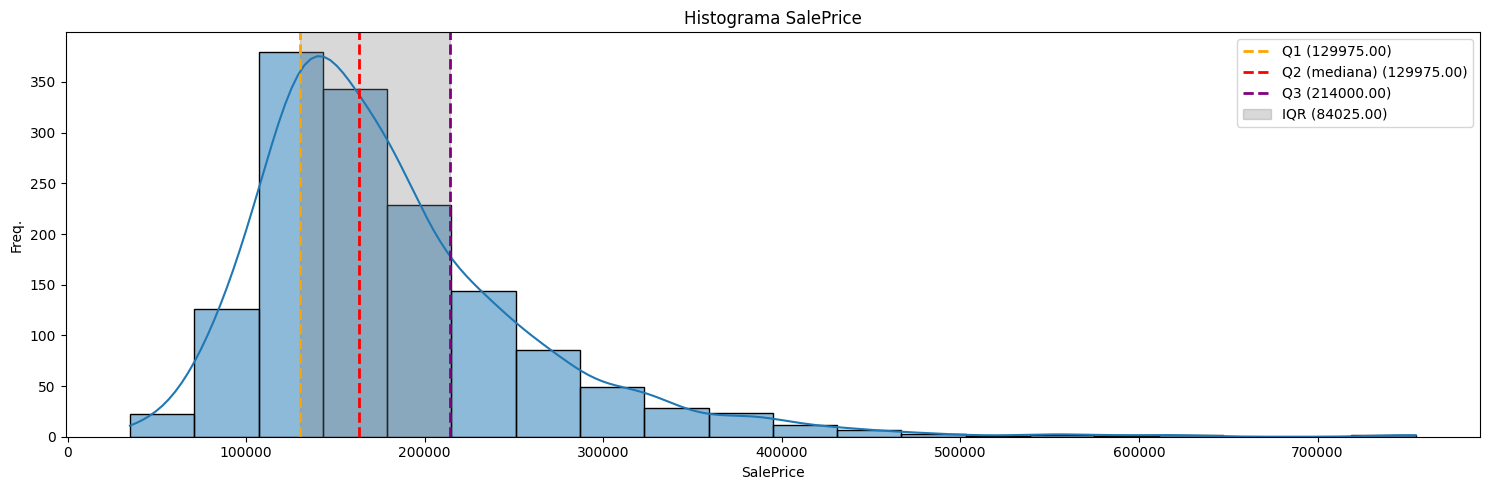

In [464]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas

graficar_histogramas(df, ["SalePrice"], nro_columnas=1, kde=True, bins=20, figsize=(15, 5))

Del histograma, podemos notar que efectivamente los precios están sesgados hacia la izquierda.

## 2. Exploración y preprocesamiento de datos:

### Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.

In [465]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas


columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

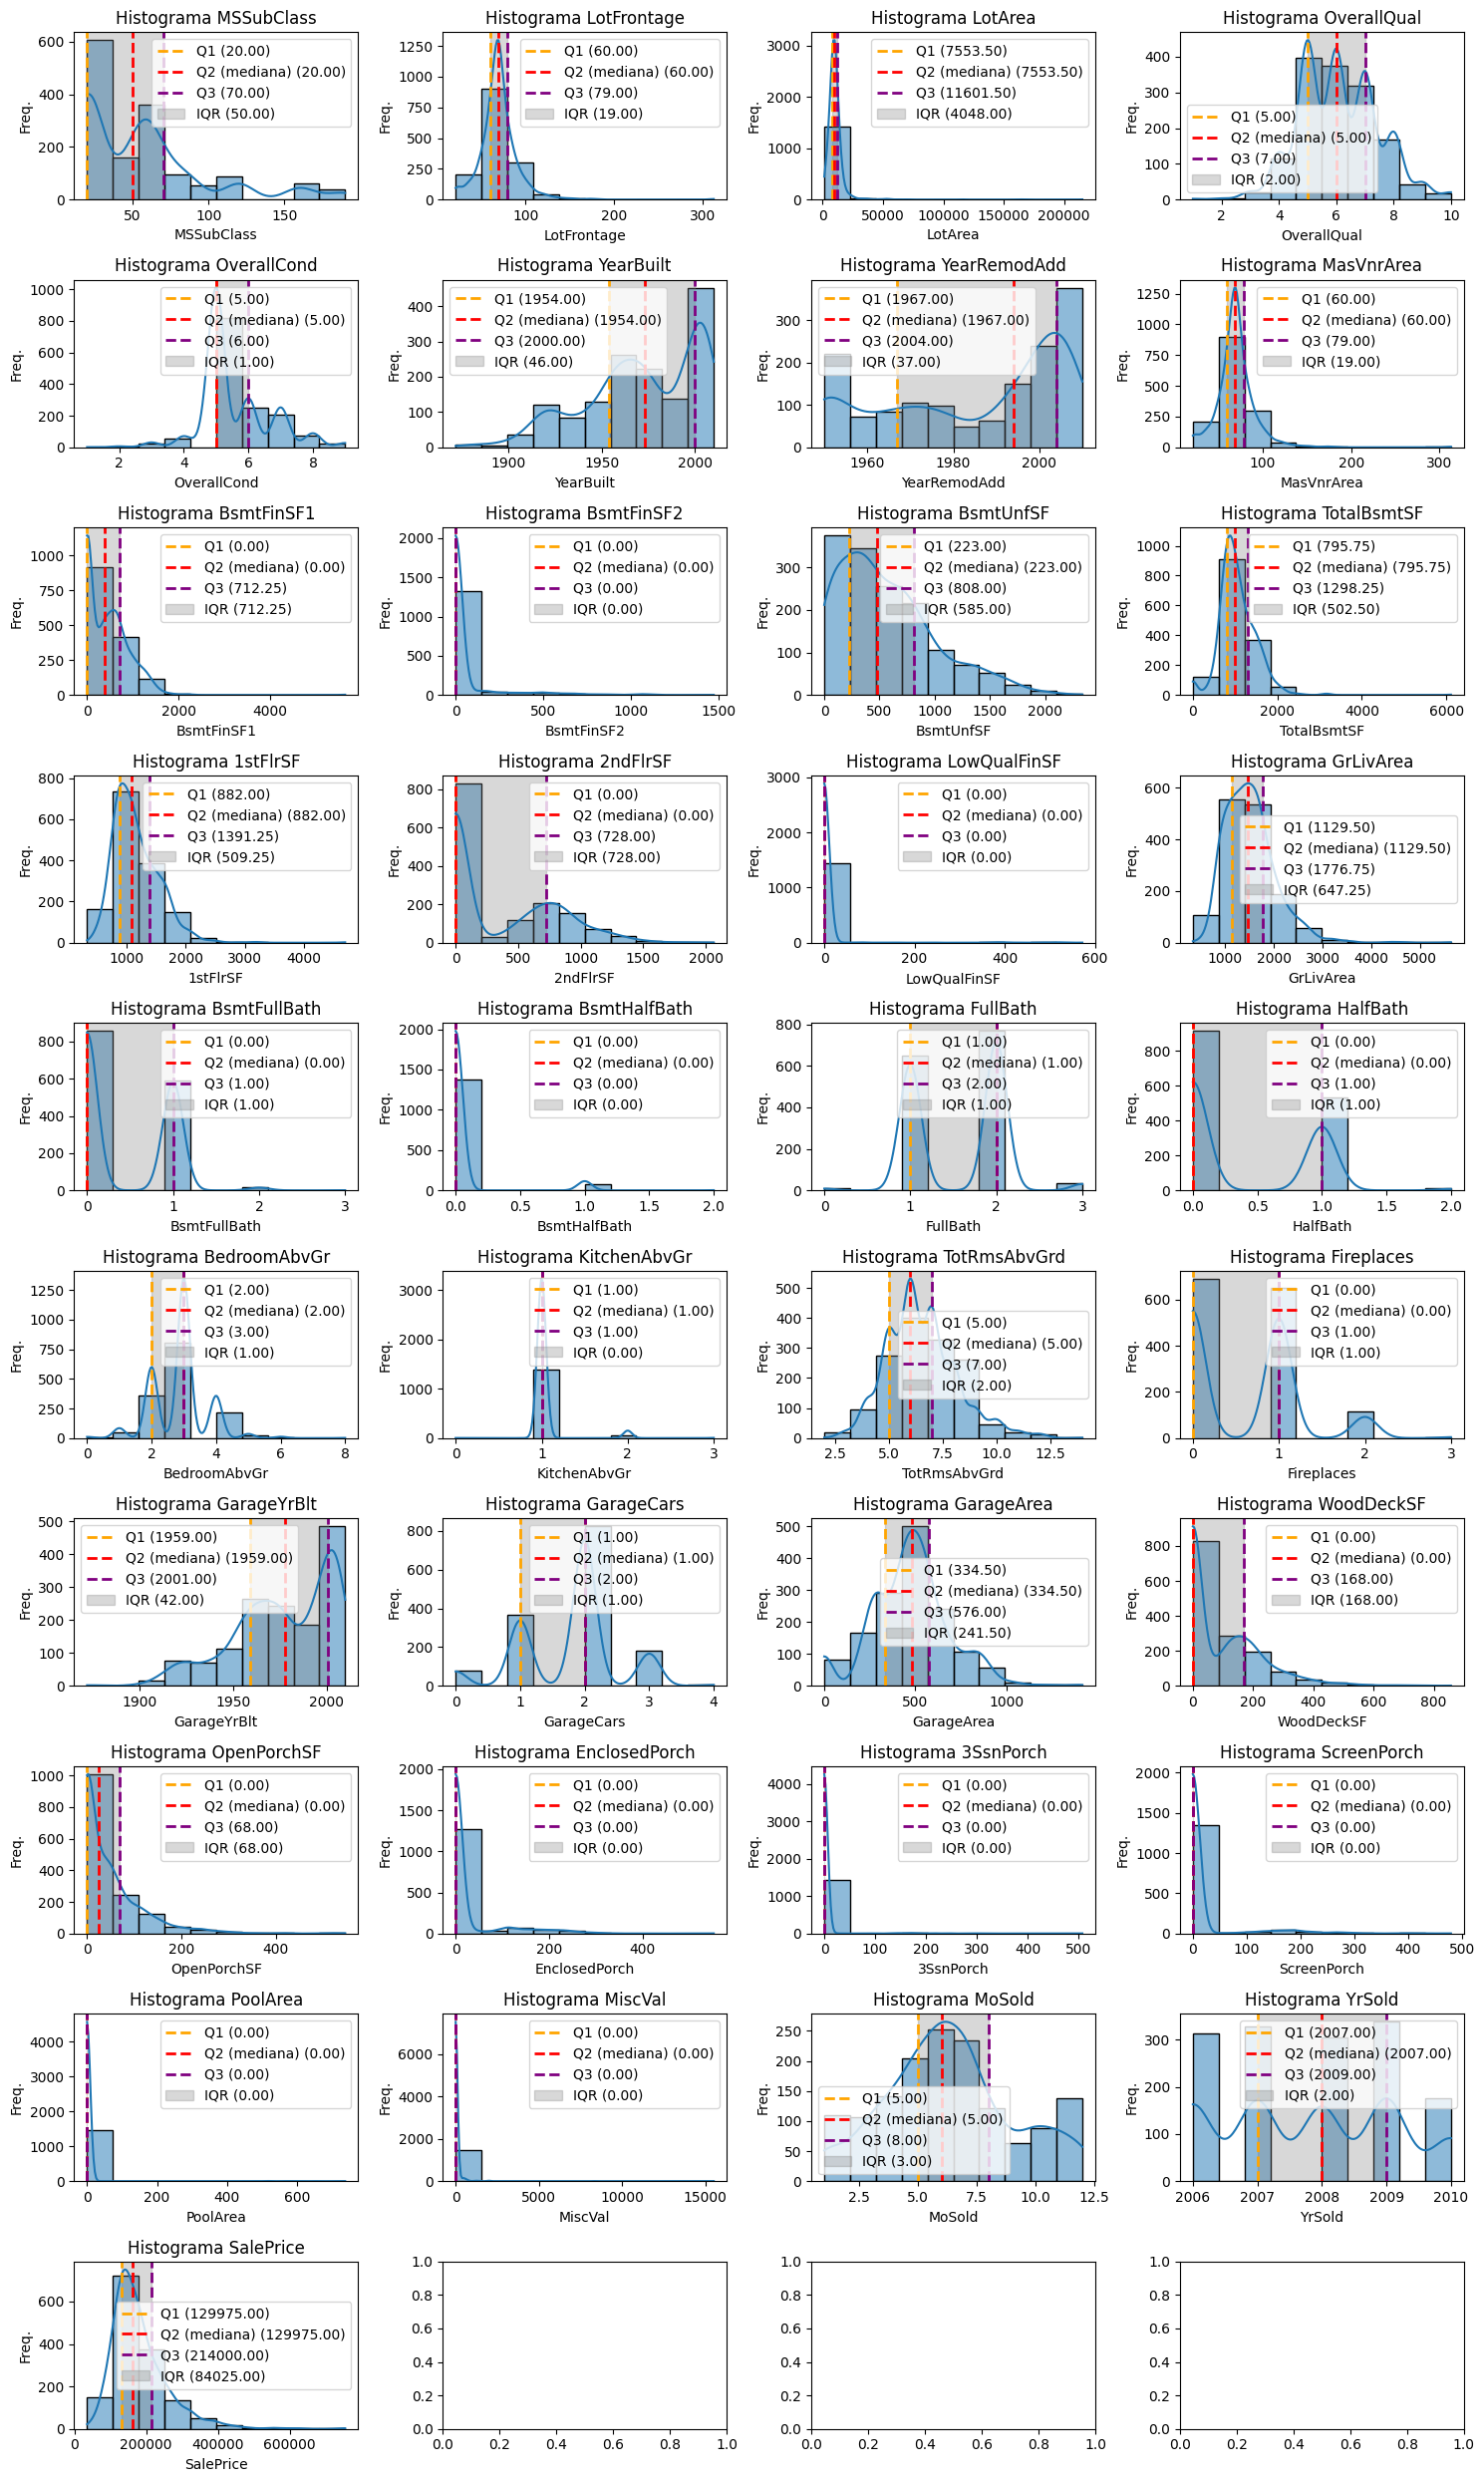

In [466]:
graficar_histogramas(df, columnas_numericas, nro_columnas=4, kde=True, bins=10, figsize=(15, 25))

Se puede notar de los gráficos que una gran cantidad de variables no sigue una distribución estándar. Es también muy probable que los datos contengan outliers. Se verá mejor en los gráficos de boxplots. Esto hay que tenerlo en cuenta al momento de elegir la técnica de escalamiento.

Podemos notar que efectivamente SalePrice está sesgado hacia precios mas bajos.

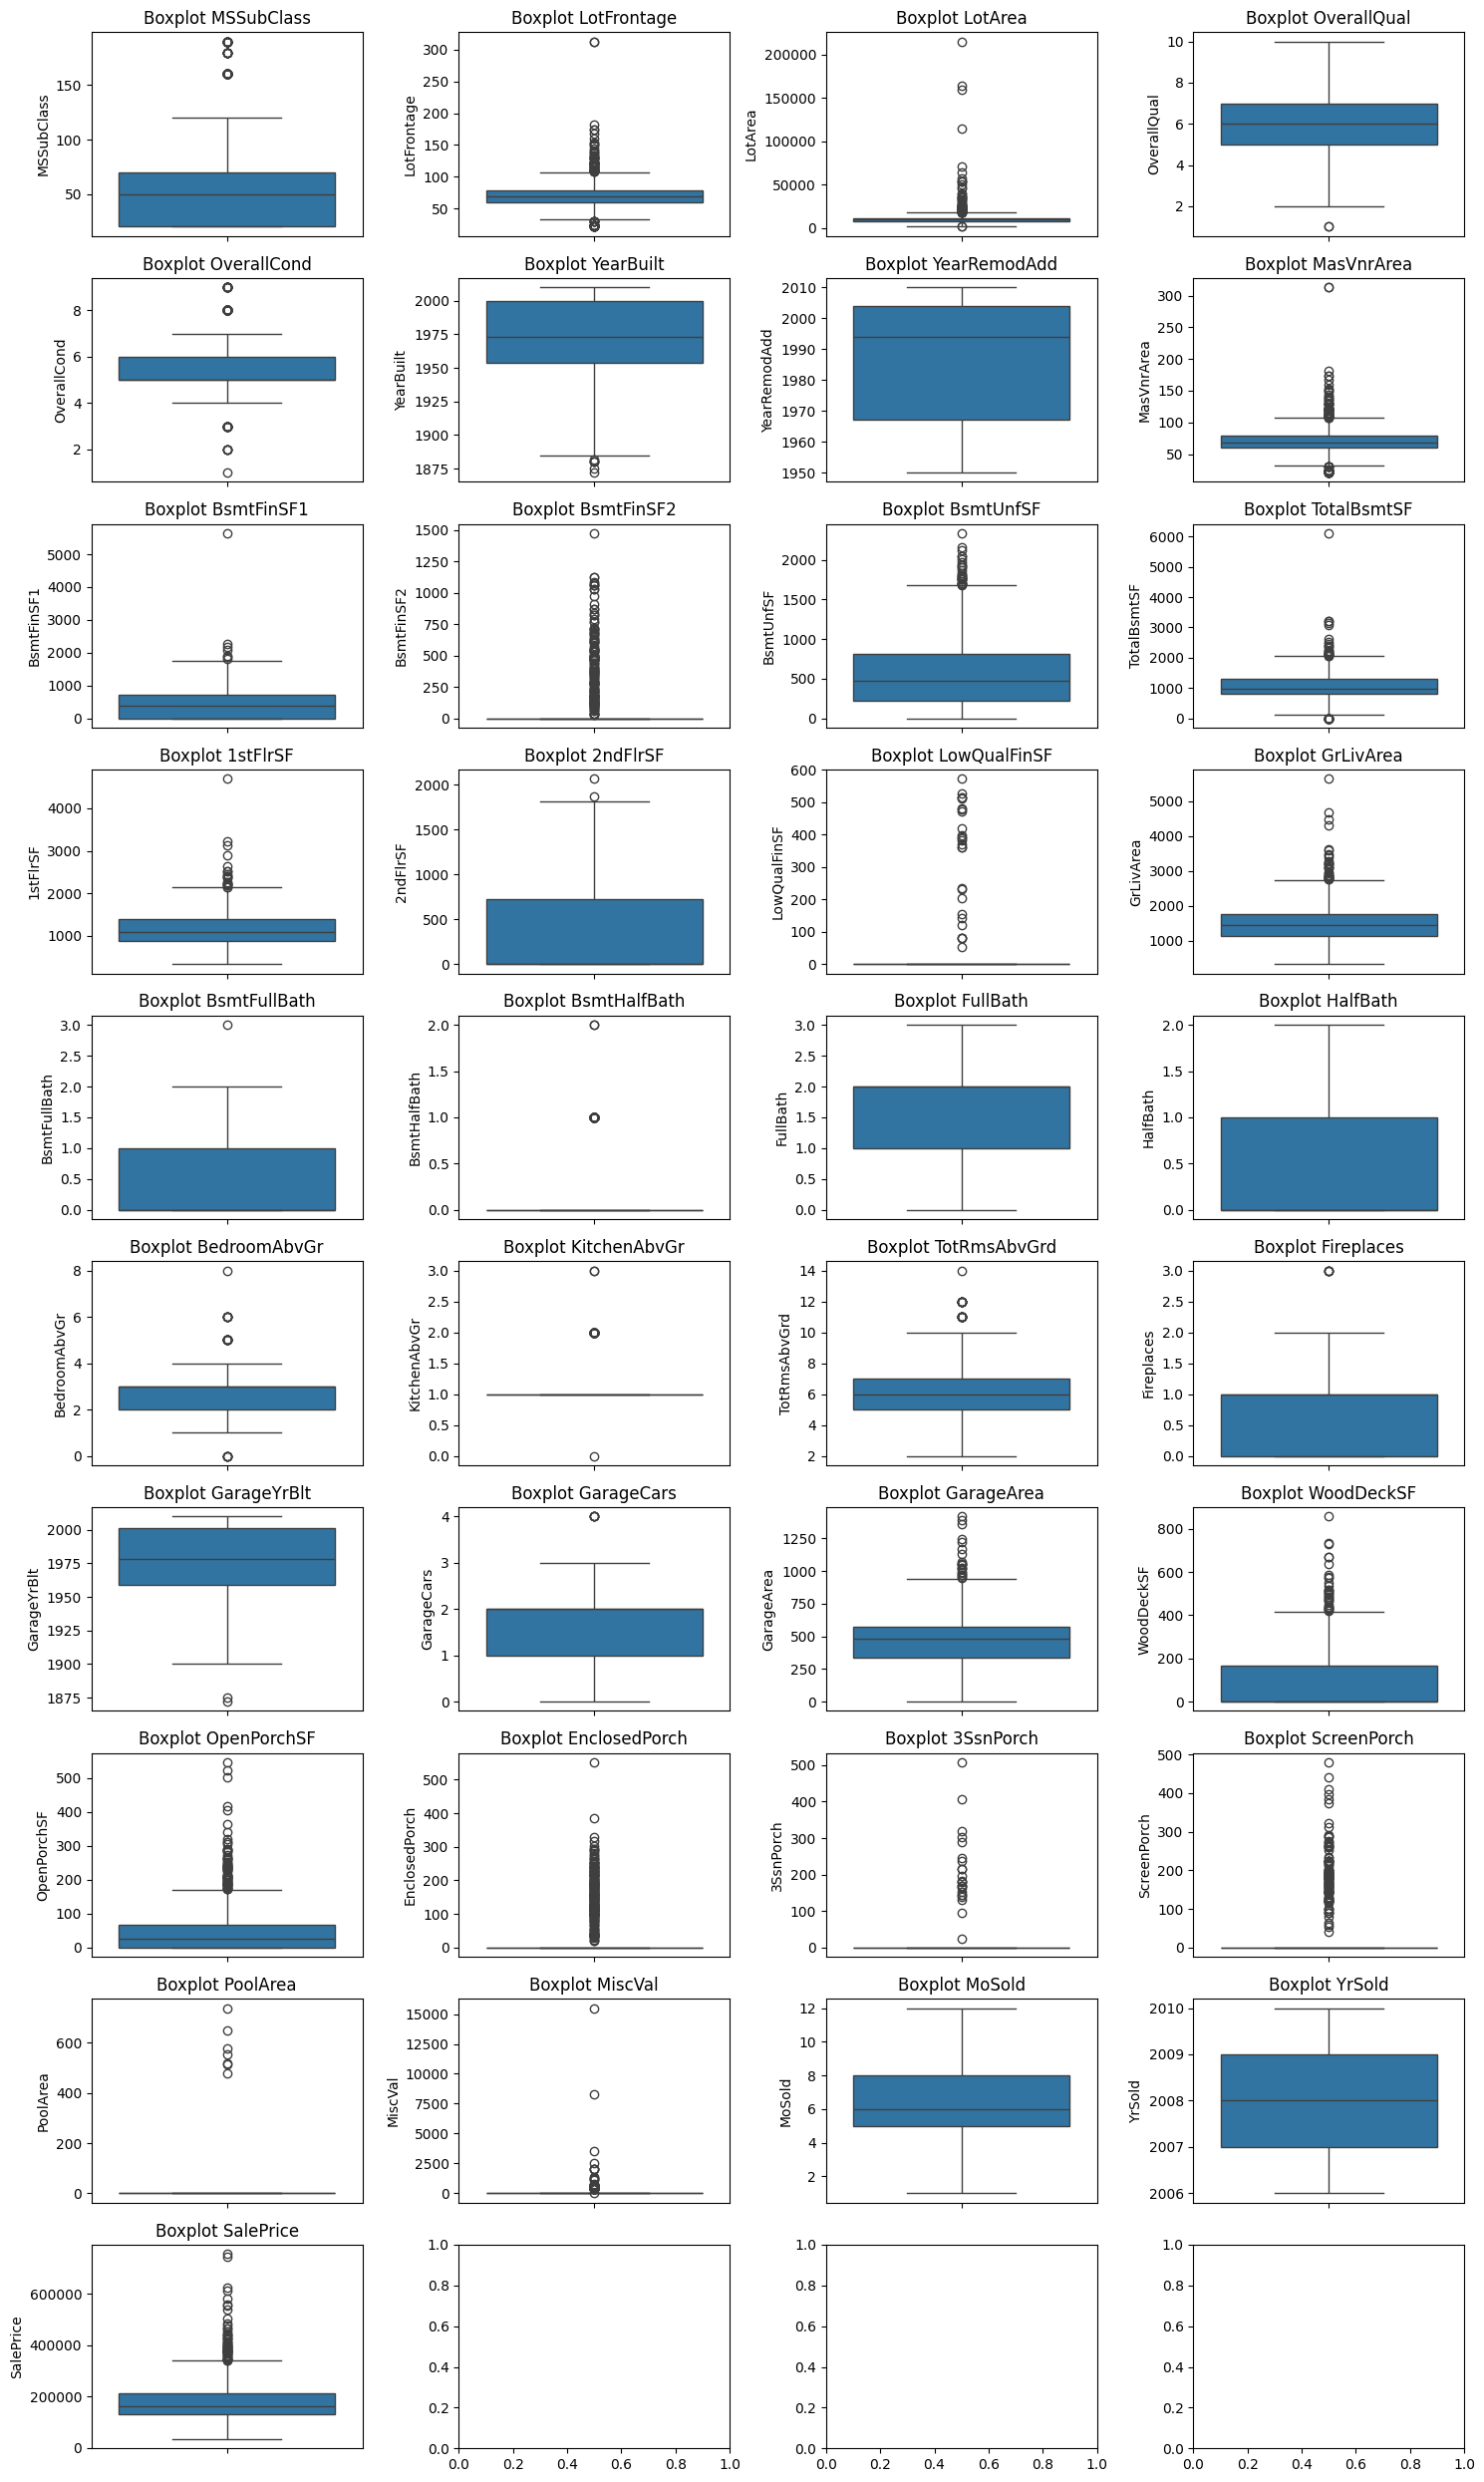

In [467]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 25))

De los boxplots, se puede notar una gran cantidad de outliers, que indica que potencialmente la mejor técnica de escalamiento para este dataset es usar el RobustScaler.

In [468]:
correlaciones_precio = df[[*columnas_numericas]].corr()["SalePrice"]
# Se selecciona este threshold.
threshold_correlaciones = 0.1

columnas_seleccionadas = correlaciones_precio[abs(correlaciones_precio) > threshold_correlaciones].index.drop("SalePrice").tolist()

columnas_seleccionadas

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
               LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
LotFrontage       1.000000  0.304522     0.234812   0.116685      0.083348   
LotArea           0.304522  1.000000     0.105806   0.014228      0.013788   
OverallQual       0.234812  0.105806     1.000000   0.572323      0.550684   
YearBuilt         0.116685  0.014228     0.572323   1.000000      0.592855   
YearRemodAdd      0.083348  0.013788     0.550684   0.592855      1.000000   
MasVnrArea        1.000000  0.304522     0.234812   0.116685      0.083348   
BsmtFinSF1        0.214367  0.214103     0.239666   0.249503      0.128

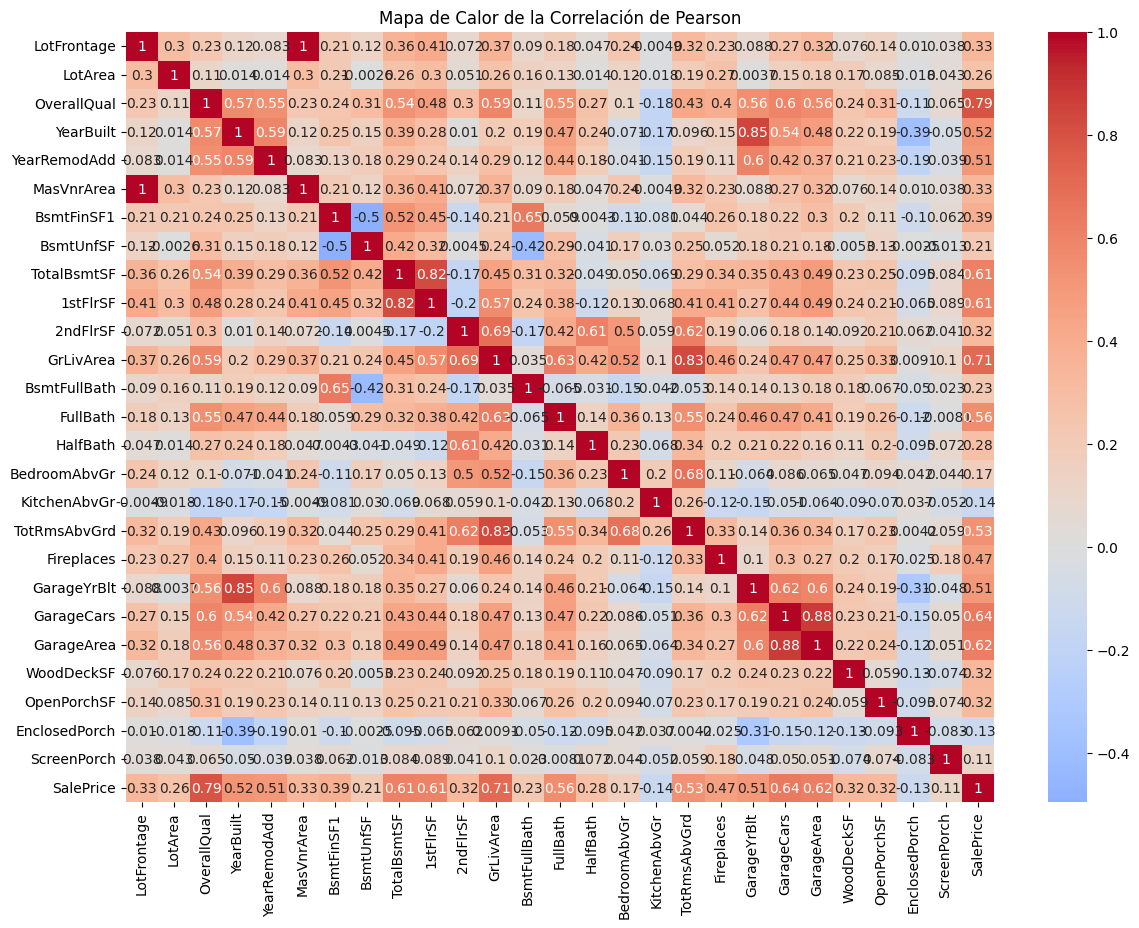

In [469]:
from utils.eda_utils import graficar_mapa_correlacion


columnas_seleccionadas += ["SalePrice"]
print(columnas_seleccionadas)

graficar_mapa_correlacion(df, columnas_seleccionadas)

#### Detección de variables sesgadas.

In [470]:
columnas_numericas = obtener_columnas_numericas_df(df)

# Calcular el coeficiente de asimetría (skewness) de cada columna numérica
skewness = df[columnas_numericas].skew()

# Definir un umbral para considerar una columna como sesgada
umbral = 0.5  # Puedes ajustar el valor según tus necesidades

# Filtrar las columnas sesgadas
columnas_sesgadas = skewness[skewness.abs() > umbral].index

print("Columnas sesgadas:", list(columnas_sesgadas))

Columnas sesgadas: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


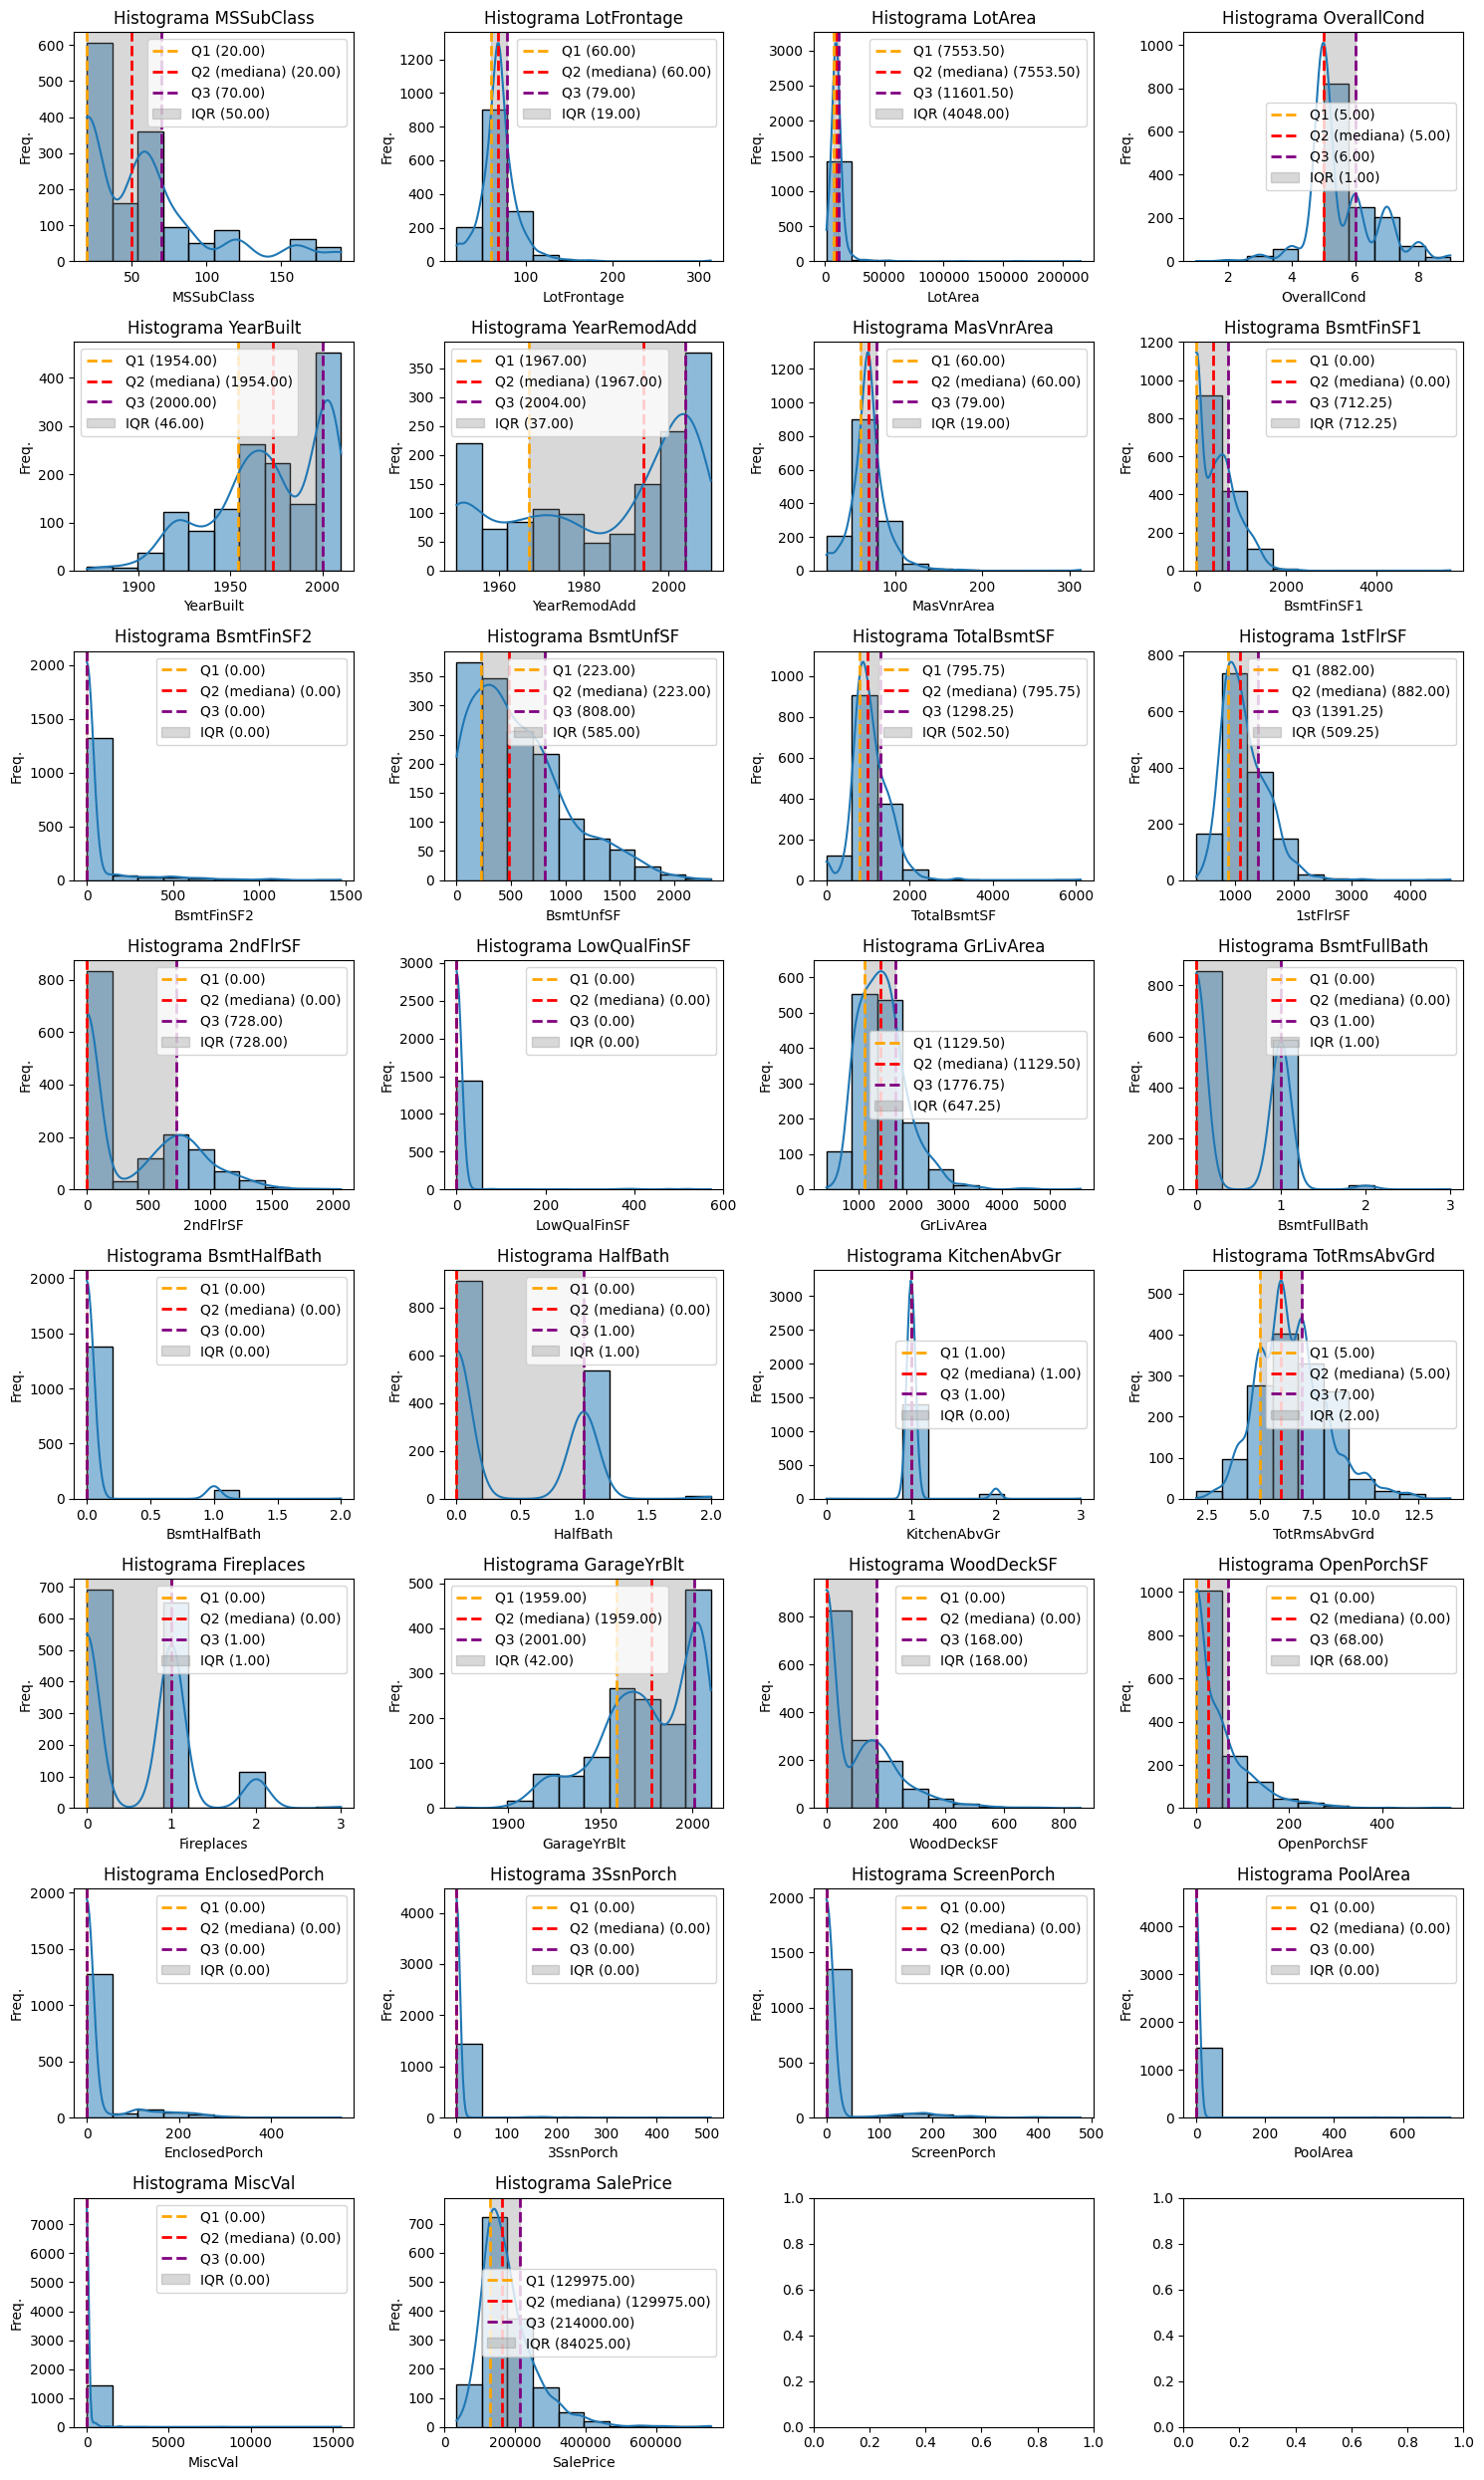

In [471]:
graficar_histogramas(df, columnas_sesgadas, nro_columnas=4, kde=True, bins=10, figsize=(15, 25))

### También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

De los histogramas, se pudo notar que efectivamente hubieron muchas variables que deben ser escaladas apropiadamente.

## 3. Transformaciones de variables:

### Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.

### Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.

### Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

Se realizarán estos tres pasos en un solo pipeline.

In [472]:
columnas_sesgadas_x = [*columnas_sesgadas]
columnas_sesgadas_x.remove("SalePrice")

Importamos librerías necesarias.

In [473]:
import numpy as np
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
import lightgbm as lgb

In [474]:
campo_salida = "SalePrice"

columnas_prediccion = df.columns.tolist()
columnas_prediccion.remove("SalePrice")
columnas_numericas = obtener_columnas_numericas_df(df)
columnas_numericas.remove("SalePrice")


X = df[[*columnas_prediccion]]
y = df[campo_salida]

In [475]:
mapeo_columnas_ordinales = [
    {
        "col": "ExterCond",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "ExterQual",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "BsmtCond",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "BsmtExposure",
        "mapping": [
            "na",
            "no",
            "mn",
            "av",
            "gd",
        ]
    },
    {
        "col": "BsmtFinType1",
        "mapping": [
            "na",
            "unf",
            "lwq",
            "rec",
            "blq",
            "alq",
            "glq",
        ]
    },
    {
        "col": "BsmtFinType2",
        "mapping": [
            "na",
            "unf",
            "lwq",
            "rec",
            "blq",
            "alq",
            "glq",
        ]
    },
    {
        "col": "HeatingQC",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "KitchenQual",
        "mapping": [
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "Functional",
        "mapping": [
            "sal",
            "sev",
            "maj2",
            "maj1",
            "mod",
            "min2",
            "min1",
            "typ",
        ]
    },
    {
        "col": "FireplaceQu",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "GarageFinish",
        "mapping": [
            "na",
            "unf",
            "rfn",
            "fin",
        ]
    },
    {
        "col": "GarageQual",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "GarageCond",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "PoolQC",
        "mapping": [
            "na",
            "po",
            "fa",
            "ta",
            "gd",
            "ex",
        ]
    },
    {
        "col": "Fence",
        "mapping": [
            "na",
            "mnww",
            "gdwo",
            "mnprv",
            "gdprv",
        ]
    },
]

In [476]:
categories_ordinal_encoder = []
columnas_ordinal_encoder = []

# Preparamos los parámetros para el Ordinal Encoder.
for mapeo_columna in mapeo_columnas_ordinales:
    nombre_columna = mapeo_columna["col"]

    if nombre_columna in columnas_prediccion:
        mapeo_columnas = mapeo_columna["mapping"]

        categories_ordinal_encoder.append(mapeo_columnas)
        columnas_ordinal_encoder.append(nombre_columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna not in columnas_ordinal_encoder and columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)


print(categories_ordinal_encoder)
print(columnas_ordinal_encoder)
print(columnas_categoricas_a_convertir_onehot)

[['po', 'fa', 'ta', 'gd', 'ex'], ['po', 'fa', 'ta', 'gd', 'ex'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'no', 'mn', 'av', 'gd'], ['na', 'unf', 'lwq', 'rec', 'blq', 'alq', 'glq'], ['na', 'unf', 'lwq', 'rec', 'blq', 'alq', 'glq'], ['po', 'fa', 'ta', 'gd', 'ex'], ['po', 'fa', 'ta', 'gd', 'ex'], ['sal', 'sev', 'maj2', 'maj1', 'mod', 'min2', 'min1', 'typ'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'unf', 'rfn', 'fin'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'po', 'fa', 'ta', 'gd', 'ex'], ['na', 'mnww', 'gdwo', 'mnprv', 'gdprv']]
['ExterCond', 'ExterQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', '

In [477]:
columnas_sesgadas_x_no_lot_area = [*columnas_sesgadas_x]
columnas_sesgadas_x_no_lot_area.remove("LotArea")

In [478]:
def log_feature_names(transformer, feature_names):
    return [f'log_{col}' for col in feature_names]


def poly_feature_names(transformer, feature_names):
    return [f'log_{col}' for col in feature_names]


polynomial_log_transformer = Pipeline(
    steps=[
        ("pol", PolynomialFeatures(degree=2, include_bias=False)),
        ("log", FunctionTransformer(np.log1p, validate=True, feature_names_out=log_feature_names))
    ]
)


log_transformer = ColumnTransformer(
    transformers=[
        ("regular_log", FunctionTransformer(np.log1p, validate=True, feature_names_out=log_feature_names), columnas_sesgadas_x_no_lot_area),
        ("pol_log", polynomial_log_transformer, ["LotArea"]),
        
    ],
    remainder="passthrough"
)

scaler = Pipeline(steps=[
    ("log", log_transformer),
    ("scaler", RobustScaler())
])

preprocessor_no_transform = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), columnas_numericas),
        ("ordinal", OrdinalEncoder(categories=categories_ordinal_encoder), columnas_ordinal_encoder),
        ("onehot",  OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas_a_convertir_onehot),
    ],
    remainder="passthrough"
)


preprocessor_transform = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas),
        ("ordinal", OrdinalEncoder(categories=categories_ordinal_encoder), columnas_ordinal_encoder),
        ("onehot",  OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas_a_convertir_onehot),
    ],
    remainder="passthrough"
)

Verificamos el funcionamiento correcto del preprocesador.

In [479]:
X_transf_no_transform = preprocessor_no_transform.fit_transform(X)

df_transf_no_transform = pd.DataFrame(X_transf_no_transform, columns=preprocessor_no_transform.get_feature_names_out())

df_transf_no_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 237 entries, num__MSSubClass to remainder__CentralAir
dtypes: float64(237)
memory usage: 2.6 MB


In [480]:
df_transf_no_transform.columns.tolist()

['num__MSSubClass',
 'num__LotFrontage',
 'num__LotArea',
 'num__OverallQual',
 'num__OverallCond',
 'num__YearBuilt',
 'num__YearRemodAdd',
 'num__MasVnrArea',
 'num__BsmtFinSF1',
 'num__BsmtFinSF2',
 'num__BsmtUnfSF',
 'num__TotalBsmtSF',
 'num__1stFlrSF',
 'num__2ndFlrSF',
 'num__LowQualFinSF',
 'num__GrLivArea',
 'num__BsmtFullBath',
 'num__BsmtHalfBath',
 'num__FullBath',
 'num__HalfBath',
 'num__BedroomAbvGr',
 'num__KitchenAbvGr',
 'num__TotRmsAbvGrd',
 'num__Fireplaces',
 'num__GarageYrBlt',
 'num__GarageCars',
 'num__GarageArea',
 'num__WoodDeckSF',
 'num__OpenPorchSF',
 'num__EnclosedPorch',
 'num__3SsnPorch',
 'num__ScreenPorch',
 'num__PoolArea',
 'num__MiscVal',
 'num__MoSold',
 'num__YrSold',
 'ordinal__ExterCond',
 'ordinal__ExterQual',
 'ordinal__BsmtCond',
 'ordinal__BsmtExposure',
 'ordinal__BsmtFinType1',
 'ordinal__BsmtFinType2',
 'ordinal__HeatingQC',
 'ordinal__KitchenQual',
 'ordinal__Functional',
 'ordinal__FireplaceQu',
 'ordinal__GarageFinish',
 'ordinal__Gara

In [481]:
X_transf = preprocessor_transform.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor_transform.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 238 entries, num__regular_log__log_MSSubClass to remainder__CentralAir
dtypes: float64(238)
memory usage: 2.7 MB


In [482]:
df_transf.columns.tolist()

['num__regular_log__log_MSSubClass',
 'num__regular_log__log_LotFrontage',
 'num__regular_log__log_OverallCond',
 'num__regular_log__log_YearBuilt',
 'num__regular_log__log_YearRemodAdd',
 'num__regular_log__log_MasVnrArea',
 'num__regular_log__log_BsmtFinSF1',
 'num__regular_log__log_BsmtFinSF2',
 'num__regular_log__log_BsmtUnfSF',
 'num__regular_log__log_TotalBsmtSF',
 'num__regular_log__log_1stFlrSF',
 'num__regular_log__log_2ndFlrSF',
 'num__regular_log__log_LowQualFinSF',
 'num__regular_log__log_GrLivArea',
 'num__regular_log__log_BsmtFullBath',
 'num__regular_log__log_BsmtHalfBath',
 'num__regular_log__log_HalfBath',
 'num__regular_log__log_KitchenAbvGr',
 'num__regular_log__log_TotRmsAbvGrd',
 'num__regular_log__log_Fireplaces',
 'num__regular_log__log_GarageYrBlt',
 'num__regular_log__log_WoodDeckSF',
 'num__regular_log__log_OpenPorchSF',
 'num__regular_log__log_EnclosedPorch',
 'num__regular_log__log_3SsnPorch',
 'num__regular_log__log_ScreenPorch',
 'num__regular_log__log_Poo

In [483]:
obtener_estadisticas_descriptivas_df_es(df_transf).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
num__regular_log__log_MSSubClass,1460.0,-0.728398,1.083971,-0.092789,0.565078,0.0,-6.089909
num__regular_log__log_LotFrontage,1460.0,-4.268637,5.535248,-0.125555,1.159476,0.0,-9.234832
num__regular_log__log_OverallCond,1460.0,-7.126873,3.313807,0.502795,1.092439,0.0,2.172731
num__regular_log__log_YearBuilt,1460.0,-2.258280,0.798481,-0.042819,0.661710,0.0,-15.453685
num__regular_log__log_YearRemodAdd,1460.0,-1.197341,0.428860,-0.249287,0.559644,0.0,-2.244980
...,...,...,...,...,...,...,...
onehot__SaleCondition_alloca,1460.0,0.000000,1.000000,0.008219,0.090317,0.0,10.988602
onehot__SaleCondition_family,1460.0,0.000000,1.000000,0.013699,0.116277,0.0,8.488189
onehot__SaleCondition_normal,1460.0,0.000000,1.000000,0.820548,0.383862,1.0,0.467812
onehot__SaleCondition_partial,1460.0,0.000000,1.000000,0.085616,0.279893,0.0,3.269147


In [484]:
del df_transf
del X_transf
del df_transf_no_transform
del X_transf_no_transform

### División del Dataset en train y test

In [485]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

## 4. Evaluación de las transformaciones

### Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.

#### KNN

In [486]:
# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn_base = Pipeline(
        steps=[
            ("preprocessor", preprocessor_transform),
            ("model", KNeighborsRegressor(n_neighbors=k))
        ]
    )
    knn = TransformedTargetRegressor(
        regressor=knn_base,  # Modelo base
        func=np.log1p,  # Transformación logarítmica de y
        inverse_func=np.expm1  # Reconversión a escala original
    )
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 4


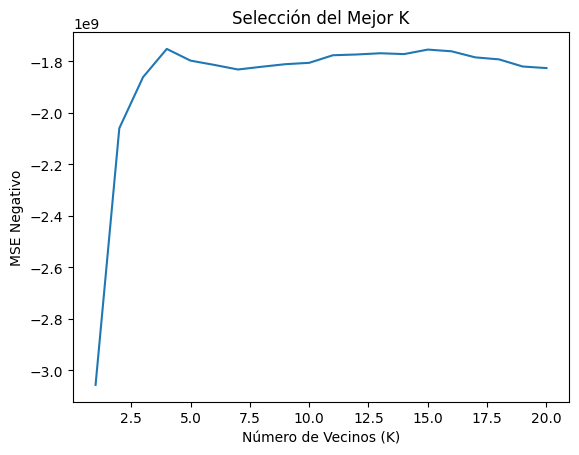

In [487]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

In [488]:
knn_no_transform = Pipeline(
    steps=[
        ("preprocessor", preprocessor_no_transform),
        ("model", KNeighborsRegressor(n_neighbors=4))
    ]
)

knn_base_transform = Pipeline(
    steps=[
        ("preprocessor", preprocessor_transform),
        ("model", KNeighborsRegressor(n_neighbors=4))
    ]
)

knn = TransformedTargetRegressor(
    regressor=knn_base_transform,  # Modelo base
    func=np.log1p,  # Transformación logarítmica de y
    inverse_func=np.expm1  # Reconversión a escala original
)


knn_no_transform.fit(X_train, y_train)
knn.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                                          transformers=[('regular_log',
                                                                                                                                         FunctionTransformer(feature_names_out=<function log_feature_names at 0x13b8dfeb...
                                                                                        'LotShape',
                                                                                        'LandContour',
                                                                                        'Utilities',
                                                                                        'LotConfig',
                                                                                        'LandSlope',
                                                                                        'Neighborhood',
                                                                                        'Condition1',
                                                                                        'Condition2',
                                                                                        'BldgType',
                                                                                        'HouseStyle',
                                                                                        'RoofStyle',
                                                                                        'RoofMatl',
                                                                                        'Exterior1st',
                                                                                        'Exterior2nd',
                                                                                        'MasVnrType',
                                                                                        'Foundation',
                                                                                        'BsmtQual',
                                                                                        'Heating',
                                                                                        'Electrical',
                                                                                        'GarageType',
                                                                                        'PavedDrive',
                                                                                        'MiscFeature',
                                                                                        'SaleType',
                                                                                        'SaleCondition'])])),
                                                     ('model',
                                                      KNeighborsRegressor(n_neighbors=4))]))

In [489]:
# Realizar predicciones
y_pred_knn = knn.predict(X_test)
y_pred_knn_no_transform = knn_no_transform.predict(X_test)

# Evaluar el modelo
rmse_knn_no_transform = root_mean_squared_error(y_test, y_pred_knn_no_transform)
mse_knn_no_transform = rmse_knn_no_transform ** 2
r2_knn_no_transform = r2_score(y_test, y_pred_knn_no_transform)
mae_knn_no_transform = mean_absolute_error(y_test, y_pred_knn_no_transform)

rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'Raíz Error Cuadrático Medio (RMSE) No Transform: {rmse_knn_no_transform}')
print(f'Error Cuadrático Medio (MSE) No Transform: {mse_knn_no_transform}')
print(f'R-cuadrado (R2) No Transform: {r2_knn_no_transform}')
print(f'Error Absoluto Medio (MAE) No Transform: {mae_knn_no_transform}')

print("\n")

print(f'Raíz Error Cuadrático Medio (RMSE): {rmse_knn}')
print(f'Error Cuadrático Medio (MSE): {mse_knn}')
print(f'R-cuadrado (R2): {r2_knn}')
print(f'Error Absoluto Medio (MAE): {mae_knn}')

Raíz Error Cuadrático Medio (RMSE) No Transform: 52736.043882316306
Error Cuadrático Medio (MSE) No Transform: 2781090324.357591
R-cuadrado (R2) No Transform: 0.601454147846928
Error Absoluto Medio (MAE) No Transform: 32500.87328767123


Raíz Error Cuadrático Medio (RMSE): 39933.125402788406
Error Cuadrático Medio (MSE): 1594654504.4348247
R-cuadrado (R2): 0.7714770596289362
Error Absoluto Medio (MAE): 24114.6736776391


#### LGBM

In [490]:
lgbm_no_transform = Pipeline(steps=[
    ("preprocessor", preprocessor_no_transform),
    ("model", lgb.LGBMRegressor(random_state=42))
])

lgbm_base_transform = Pipeline(steps=[
    ("preprocessor", preprocessor_transform),
    ("model", lgb.LGBMRegressor(random_state=42))
])

lgbm = TransformedTargetRegressor(
    regressor=lgbm_base_transform,  # Modelo base
    func=np.log1p,  # Transformación logarítmica de y
    inverse_func=np.expm1  # Reconversión a escala original
)


lgbm_no_transform.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3010
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 144
[LightGBM] [Info] Start training from score 181312.692759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 145
[LightGBM] [Info] Start training from score 12.028899


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                                          transformers=[('regular_log',
                                                                                                                                         FunctionTransformer(feature_names_out=<function log_feature_names at 0x13b8dfeb...
                                                                                        'LotShape',
                                                                                        'LandContour',
                                                                                        'Utilities',
                                                                                        'LotConfig',
                                                                                        'LandSlope',
                                                                                        'Neighborhood',
                                                                                        'Condition1',
                                                                                        'Condition2',
                                                                                        'BldgType',
                                                                                        'HouseStyle',
                                                                                        'RoofStyle',
                                                                                        'RoofMatl',
                                                                                        'Exterior1st',
                                                                                        'Exterior2nd',
                                                                                        'MasVnrType',
                                                                                        'Foundation',
                                                                                        'BsmtQual',
                                                                                        'Heating',
                                                                                        'Electrical',
                                                                                        'GarageType',
                                                                                        'PavedDrive',
                                                                                        'MiscFeature',
                                                                                        'SaleType',
                                                                                        'SaleCondition'])])),
                                                     ('model',
                                                      LGBMRegressor(random_state=42))]))

In [491]:
# Realizar predicciones
y_pred_lgbm_no_transform = lgbm_no_transform.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)


# Evaluar el modelo
rmse_lgbm_no_transform = root_mean_squared_error(y_test, y_pred_lgbm_no_transform)
mse_lgbm_no_transform = rmse_lgbm_no_transform ** 2
r2_lgbm_no_transform = r2_score(y_test, y_pred_lgbm_no_transform)
mae_lgbm_no_transform = mean_absolute_error(y_test, y_pred_lgbm_no_transform)

rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)
mse_lgbm = rmse_lgbm ** 2
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f'Raíz Error Cuadrático Medio No Transform (RMSE): {rmse_lgbm_no_transform}')
print(f'Error Cuadrático Medio No Transform (MSE): {mse_lgbm_no_transform}')
print(f'R-cuadrado No Transform (R2): {r2_lgbm_no_transform}')
print(f'Error Absoluto Medio No Transform (MAE): {mae_lgbm_no_transform}')

print("\n")

print(f'Raíz Error Cuadrático Medio (RMSE): {rmse_lgbm}')
print(f'Error Cuadrático Medio (MSE): {mse_lgbm}')
print(f'R-cuadrado (R2): {r2_lgbm}')
print(f'Error Absoluto Medio (MAE): {mae_lgbm}')

Raíz Error Cuadrático Medio No Transform (RMSE): 26528.794249659386
Error Cuadrático Medio No Transform (MSE): 703776924.340761
R-cuadrado No Transform (R2): 0.899144816843787
Error Absoluto Medio No Transform (MAE): 16271.985170554819


Raíz Error Cuadrático Medio (RMSE): 25643.961473123774
Error Cuadrático Medio (MSE): 657612760.0350565
R-cuadrado (R2): 0.9057604006818996
Error Absoluto Medio (MAE): 15522.956298968425


#### Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

En el caso del modelo KNN, podemos visualizar una gran mejora del rendimiento en todas las métricas. En el caso del modelo LGBM, podemos notar una leve mejora en el rendimiento.

## 5. Interpretación de los resultados:

### Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.

Estas transformaciones ayudan en este dataset ya que muchas columnas están sesgadas hacia la izquierda, quitando muestras, por lo cual, las transformaciones utilizadas ayudan a mitigar este efecto.

### Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.

A través de estas transformaciones, se pudo determinar que es un paso muy importante la búsqueda de sesgos en los datos, y aplicar técnicas de preprocesamiento a los mismos para ayudar a los modelos a obtener mejores resultados.

## Adicional

In [493]:
from sklearn.ensemble import RandomForestRegressor


# Modelo de Random Forest
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor_transform),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

rf = TransformedTargetRegressor(
    regressor=rf_model,  # Modelo base
    func=np.log1p,  # Transformación logarítmica de y
    inverse_func=np.expm1  # Reconversión a escala original
)

rf.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                                          transformers=[('regular_log',
                                                                                                                                         FunctionTransformer(feature_names_out=<function log_feature_names at 0x13b8dfeb...
                                                                                        'LotShape',
                                                                                        'LandContour',
                                                                                        'Utilities',
                                                                                        'LotConfig',
                                                                                        'LandSlope',
                                                                                        'Neighborhood',
                                                                                        'Condition1',
                                                                                        'Condition2',
                                                                                        'BldgType',
                                                                                        'HouseStyle',
                                                                                        'RoofStyle',
                                                                                        'RoofMatl',
                                                                                        'Exterior1st',
                                                                                        'Exterior2nd',
                                                                                        'MasVnrType',
                                                                                        'Foundation',
                                                                                        'BsmtQual',
                                                                                        'Heating',
                                                                                        'Electrical',
                                                                                        'GarageType',
                                                                                        'PavedDrive',
                                                                                        'MiscFeature',
                                                                                        'SaleType',
                                                                                        'SaleCondition'])])),
                                                     ('model',
                                                      RandomForestRegressor(random_state=42))]))

In [494]:
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mse_rf = rmse_rf ** 2
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Raíz Error Cuadrático Medio (RMSE): {rmse_rf}')
print(f'Error Cuadrático Medio (MSE): {mse_rf}')
print(f'R-cuadrado (R2): {r2_rf}')
print(f'Error Absoluto Medio (MAE): {mae_rf}')

Raíz Error Cuadrático Medio (RMSE): 27070.819528710475
Error Cuadrático Medio (MSE): 732829269.9560125
R-cuadrado (R2): 0.8949814526628878
Error Absoluto Medio (MAE): 16612.182720107816
